In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Clean/preprocess the data

In [2]:
df = pd.read_csv("Framingham Dataset.csv")

# Drop known leakage variables (except ANYCHD)
drop_cols = [
    'RANDID', 'TIME', 'PERIOD', 'DEATH', 'STROKE', 'CVD', 'HYPERTEN',
    'MI_FCHD', 'HOSPMI', 'ANGINA', 'TIMEAP', 'TIMEMI', 'TIMEMIFC',
    'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Drop 'educ' column
df.drop(columns=['educ'], inplace=True, errors='ignore')

# Print number of rows before removing missing values
print("Original number of rows:", len(df))

# Count how many rows have missing values
rows_with_na = df.isnull().any(axis=1).sum()
print("Rows with missing values:", rows_with_na)

# Print number and percent of missing values per column
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing']
missing_summary['Percent'] = round((missing_summary['Missing'] / len(df)) * 100, 2)
missing_summary = missing_summary.sort_values(by='Missing', ascending=False)
print(missing_summary)

# Drop LDLC and HDLC due to high missingness
df.drop(columns=['LDLC', 'HDLC'], inplace=True, errors='ignore')

# Impute missing values
df['GLUCOSE'] = df['GLUCOSE'].fillna(df['GLUCOSE'].median())
df['BPMEDS'] = df['BPMEDS'].fillna(df['BPMEDS'].mode().iloc[0])
df['TOTCHOL'] = df['TOTCHOL'].fillna(df['TOTCHOL'].median())

# Handle CIGPDAY logic
df.loc[df['CIGPDAY'].isna() & (df['CURSMOKE'] == 0), 'CIGPDAY'] = 0
df['CIGPDAY'] = df['CIGPDAY'].fillna(df['CIGPDAY'].median())

df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['HEARTRTE'] = df['HEARTRTE'].fillna(df['HEARTRTE'].median())

# Final checks
print(df.head())
print(f"Final shape of dataset: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")

# # first we drop columns with more than 50% missing values
# missing_values = df.isnull().sum()
# missing_percentage = (missing_values / len(df)) * 100
# columns_to_drop = missing_percentage[missing_percentage > 50].index.tolist()
# cleaned_df = df.drop(columns=columns_to_drop)

# # next we replace numerical columns with the median
# numerical_columns = ['TOTCHOL', 'GLUCOSE', 'BMI']
# for col in numerical_columns:
#     median_value = cleaned_df[col].median()
#     cleaned_df[col] = cleaned_df[col].fillna(median_value)

# # we replace binary/categorical columns with the mode
# categorical_columns = ['BPMEDS']
# for col in categorical_columns:
#     mode_value = cleaned_df[col].mode()[0]
#     cleaned_df[col] = cleaned_df[col].fillna(mode_value)

# # modify CIGPDAY (number of cigarettes smoked per day)
# condition = (cleaned_df['CIGPDAY'].isnull()) & (cleaned_df['CURSMOKE'] == 0)
# cleaned_df.loc[condition, 'CIGPDAY'] = 0

# median_cigpday = cleaned_df['CIGPDAY'].median()
# cleaned_df['CIGPDAY'] = cleaned_df['CIGPDAY'].fillna(median_cigpday)


# # we drop the 'educ' column because it it mostly a socioeconomic feature with low predictive power
# # won't affect our outcome too much
# cleaned_df.drop(columns=['educ'], inplace=True)

# # drop rows with missing HEARTRTE (rather just drop these rows than computing the median, because its only 6 rows)
# cleaned_df.dropna(subset=['HEARTRTE'], inplace=True)

# print(f"Final shape of dataset: {cleaned_df.shape}")
# print(f"Total missing values: {cleaned_df.isnull().sum().sum()}")


Original number of rows: 11627
Rows with missing values: 9321
      Column  Missing  Percent
18      LDLC     8601    73.97
17      HDLC     8600    73.97
11   GLUCOSE     1440    12.38
9     BPMEDS      593     5.10
1    TOTCHOL      409     3.52
6    CIGPDAY       79     0.68
7        BMI       52     0.45
10  HEARTRTE        6     0.05
13    PREVAP        0     0.00
16   PREVHYP        0     0.00
15  PREVSTRK        0     0.00
14    PREVMI        0     0.00
0        SEX        0     0.00
12   PREVCHD        0     0.00
8   DIABETES        0     0.00
5   CURSMOKE        0     0.00
4      DIABP        0     0.00
3      SYSBP        0     0.00
2        AGE        0     0.00
19    ANYCHD        0     0.00
   SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY    BMI  DIABETES  \
0    1    195.0   39  106.0   70.0         0      0.0  26.97         0   
1    1    209.0   52  121.0   66.0         0      0.0  25.48         0   
2    2    250.0   46  121.0   81.0         0      0.0  28.73     

In [4]:
print(df.head(5))

   SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY    BMI  DIABETES  \
0    1    195.0   39  106.0   70.0         0      0.0  26.97         0   
1    1    209.0   52  121.0   66.0         0      0.0  25.48         0   
2    2    250.0   46  121.0   81.0         0      0.0  28.73         0   
3    2    260.0   52  105.0   69.5         0      0.0  29.43         0   
4    2    237.0   58  108.0   66.0         0      0.0  28.50         0   

   BPMEDS  HEARTRTE  GLUCOSE  PREVCHD  PREVAP  PREVMI  PREVSTRK  PREVHYP  \
0     0.0      80.0     77.0        0       0       0         0        0   
1     0.0      69.0     92.0        0       0       0         0        0   
2     0.0      95.0     76.0        0       0       0         0        0   
3     0.0      80.0     86.0        0       0       0         0        0   
4     0.0      80.0     71.0        0       0       0         0        0   

   ANYCHD  
0       1  
1       1  
2       0  
3       0  
4       0  


In [5]:
# # now we drop more columns that give outcome leakage; i.e. columns that give the model future predictions that 
# # we wouldn't realistically have at the time of an actual prediction, such as whether a patient died during the study
# # also drop additional irrelevant columns
# target_col = 'ANYCHD'

# cols_to_drop = [
#     'RANDID',  # ID column
#     'TIME', 'PERIOD',  # timing variables
#     'DEATH', 'STROKE', 'CVD', 'HYPERTEN', 'MI_FCHD', 'HOSPMI', 'ANGINA',  # future outcomes
#     'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'  # event times
# ]

# cleaned_df_final = cleaned_df.drop(columns=cols_to_drop)

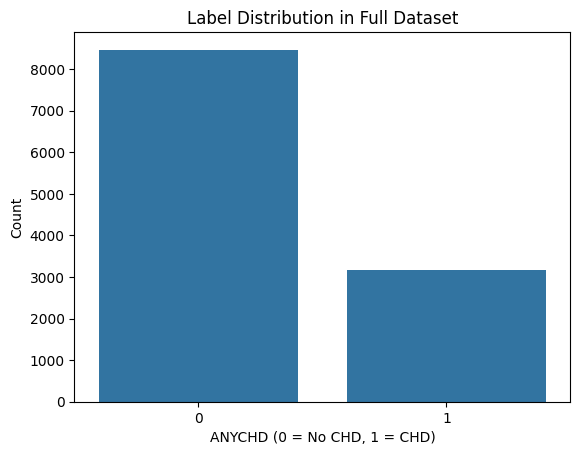

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# plot class distribution
target_col = 'ANYCHD'
sns.countplot(x=df[target_col])
plt.title("Label Distribution in Full Dataset")
plt.xlabel("ANYCHD (0 = No CHD, 1 = CHD)")
plt.ylabel("Count")
plt.show()

Training set shape: (8138, 17)
Test set shape: (3489, 17)
Training labels shape: (8138,)
Test labels shape: (3489,)


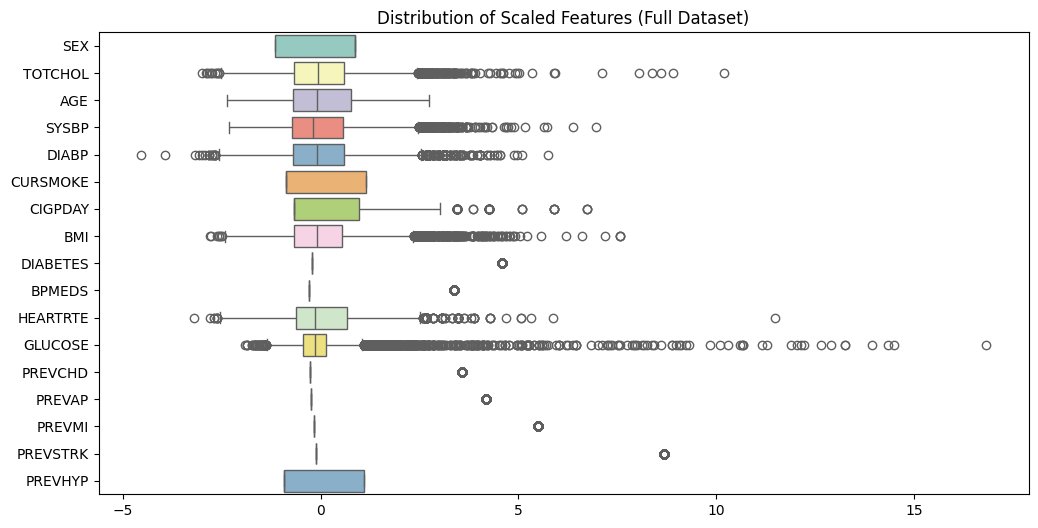

In [7]:
X = df.drop(columns=[target_col])
y = df[target_col]

# split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

# visualize entire scaled dataset
X = df.drop(columns=[target_col])
y = df[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df['ANYCHD'] = y.values

plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df.drop(columns=['ANYCHD']), orient="h", palette="Set3")
plt.title("Distribution of Scaled Features (Full Dataset)")
plt.show()


## Build the MLP

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# set random seed for reproducibility
np.random.seed(42)

# activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# initialize parameters
def initialize_parameters(n_input, n_hidden, n_output):
    W1 = np.random.randn(n_hidden, n_input) * 0.01
    b1 = np.zeros((n_hidden, 1))
    W2 = np.random.randn(n_output, n_hidden) * 0.01
    b2 = np.zeros((n_output, 1))
    return W1, b1, W2, b2


In [9]:
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X.T) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2


def compute_loss(Y, A2):
    m = Y.shape[0]
    loss = -np.mean(Y * np.log(A2.T + 1e-8) + (1 - Y) * np.log(1 - A2.T + 1e-8))
    return loss


def backward_pass(X, Y, Z1, A1, A2, W2):
    m = X.shape[0]
    dZ2 = A2 - Y.reshape(1, -1)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(dZ1, X)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2


def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    return W1, b1, W2, b2




In [10]:
# now we train our MLP
def train_mlp(X_train, y_train, n_hidden=10, epochs=1000, lr=0.01):
    n_input = X_train.shape[1]
    n_output = 1

    W1, b1, W2, b2 = initialize_parameters(n_input, n_hidden, n_output)
    loss_history = []

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        dW1, db1, dW2, db2 = backward_pass(X_train, y_train, Z1, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)

        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch} - Loss: {loss:.4f}")

    return W1, b1, W2, b2, loss_history



In [11]:
# lets predict on our MLP
# we use a threshold of 0.3 because the model is slightly biased towards the non-heart disease observations, as this
# is the majority class
def predict_with_threshold(X, W1, b1, W2, b2, threshold=0.5):  
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    return (A2 > threshold).astype(int).flatten()


In [12]:
from imblearn.over_sampling import SMOTE

# convert data to numpy
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# apply SMOTE to balance the training data (currently only 27% of our target variable is value 1 (heart disease) while rest is 0, meaning 
# that our model is biased towards the 0 case
# SMOTE will create synthetic examples of our 1 case
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_np, y_train_np)

# # check the new class distribution
# unique, counts = np.unique(y_train_balanced, return_counts=True)
# print("After SMOTE:")
# for u, c in zip(unique, counts):
#     print(f"Class {u}: {c} samples")

In [13]:
# train MLP
W1, b1, W2, b2, loss_history = train_mlp(X_train_np, y_train_np, n_hidden=10, epochs=600, lr=0.01)

Epoch 0 - Loss: 0.6933
Epoch 100 - Loss: 0.6521
Epoch 200 - Loss: 0.6270
Epoch 300 - Loss: 0.6116
Epoch 400 - Loss: 0.6020
Epoch 500 - Loss: 0.5959
Epoch 599 - Loss: 0.5921


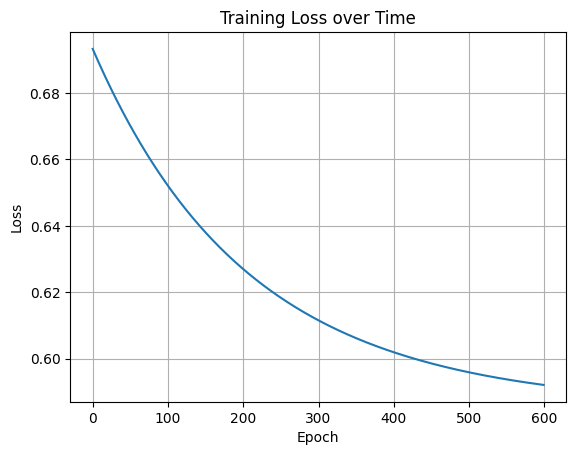

Accuracy: 0.7282889079965607
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# plot the loss curve for our model
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.show()


# lets evaluate our model
y_pred = predict_with_threshold(X_test_np, W1, b1, W2, b2)

print("Accuracy:", accuracy_score(y_test_np, y_pred))
print("Precision:", precision_score(y_test_np, y_pred))
print("Recall:", recall_score(y_test_np, y_pred))
print("F1 Score:", f1_score(y_test_np, y_pred))


In [ ]:
# unique, counts = np.unique(y_train_np, return_counts=True)
# print("Training Set Class Distribution:")
# for u, c in zip(unique, counts):
#     print(f"Class {u}: {c} samples")